In [1]:
!pip install scikit-fuzzy

  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894069 sha256=6d9949ccfbd43e09541c8ac327c6c080bded72f00a005329c04452fedec2d581
  Stored in directory: c:\users\josen\appdata\local\pip\cache\wheels\2c\04\80\7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [21]:
# Criando os universos (domínios) para entradas e saídas
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food') #0 a 10
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service') #0 a 10
tip = ctrl.Consequent(np.arange(0, 31, 1), 'tip') #0 a 30

In [22]:
# Criando funções de pertinência
food['rancid'] = fuzz.trapmf(food.universe, [0, 0, 1, 3])
food['delicious'] = fuzz.trapmf(food.universe, [7,9,10,10])

service['poor'] = fuzz.trimf(service.universe, [0,0,4])
service['good'] = fuzz.trapmf(service.universe, [1,4,6,9])
service['excellent'] = fuzz.trapmf(service.universe, [6,9,10,10])

tip['cheap'] = fuzz.trimf(tip.universe, [0, 5, 10])
tip['average'] = fuzz.trimf(tip.universe, [10, 15, 20])
tip['generous'] = fuzz.trapmf(tip.universe, [20, 25, 30,30])

C:\Users\josen\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


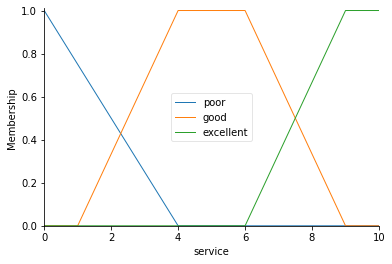

In [8]:
service.view()

C:\Users\josen\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


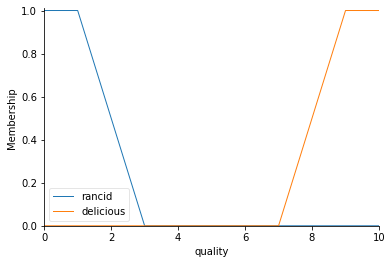

In [9]:
food.view()

C:\Users\josen\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


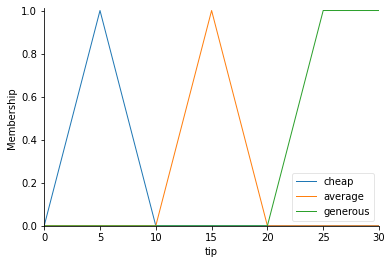

In [10]:
tip.view()

In [23]:
# Criando regras

rule_1 = ctrl.Rule(service['poor'] | food['rancid'], tip['cheap'])
rule_2 = ctrl.Rule(service['good'], tip['average'])
rule_3 = ctrl.Rule(service['excellent'] & food['delicious'], tip['generous'])

In [24]:
# Criando um controlador fuzzy genérico com as regras mapeadas pelo especialista
tipping_ctrl = ctrl.ControlSystem([rule_1, rule_2, rule_3])

# Estabelece um modelo de simulação para processar as entradas numéricas fornecidas pelo usuário no controlador acima
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [28]:
# Define entradas da UX com o usuário:
tipping.input['food'] = 7
tipping.input['service'] = 3

# Calcula a saída numérica já defuzzificada com o centroide
tipping.compute()

11.70157068062827


C:\Users\josen\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


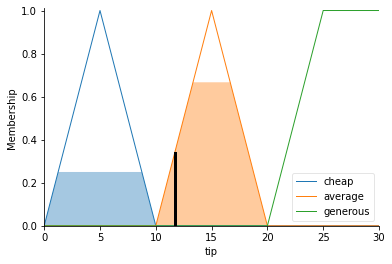

In [29]:
# Exibe resultados

print(tipping.output['tip'])

tip.view(sim=tipping)